# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as pl

import tensorflow as tf
from tensorflow import keras as keras
from sklearn import metrics as me

%matplotlib inline

## Using raw data to train a MLP
### First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

11501568/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


### Create the MLP (sequential API)

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, input_shape=(784,), activation='relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 50)                39250     
                                                                 
 dense_24 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


### Define some constants and train the MLP

In [34]:
batch_size = 128
n_epoch = 20

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.2110 - accuracy: 0.6924 - val_loss: 0.6902 - val_accuracy: 0.8394
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5869 - accuracy: 0.8550 - val_loss: 0.4817 - val_accuracy: 0.8790
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4612 - accuracy: 0.8795 - val_loss: 0.4076 - val_accuracy: 0.8924
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4059 - accuracy: 0.8906 - val_loss: 0.3686 - val_accuracy: 0.9009
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3734 - accuracy: 0.8975 - val_loss: 0.3440 - val_accuracy: 0.9055
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3512 - accuracy: 0.9026 - val_loss: 0.3262 - val_accuracy: 0.9091
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3347 - accuracy: 0.9067 - val_loss: 0.3126 - val_accuracy: 0.9132
Epoch 

### Show the performance of the model

Test score: 0.23047666251659393
Test accuracy: 0.9327999949455261


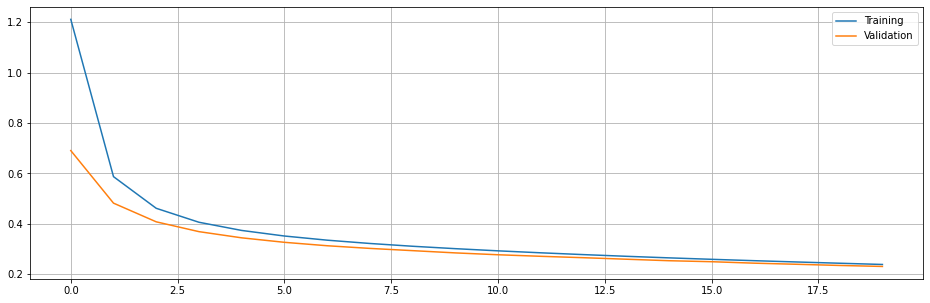

In [35]:
pl.figure(figsize=(16,5))
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Validation')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

### Confusion matrix

In [32]:
pred = np.argmax(model.predict(X_test), axis=-1)
me.confusion_matrix(y_test, pred)

array([[ 960,    0,    1,    1,    0,    3,    9,    1,    5,    0],
       [   0, 1109,    4,    2,    0,    0,    3,    2,   15,    0],
       [  11,    2,  941,    9,   15,    1,   11,   16,   26,    0],
       [   2,    0,   18,  920,    0,   31,    2,   17,   18,    2],
       [   1,    2,    2,    1,  925,    0,   16,    2,    3,   30],
       [   9,    2,    8,   34,    8,  781,   10,    5,   27,    8],
       [  11,    3,    4,    0,    8,   10,  916,    1,    5,    0],
       [   3,   13,   23,    5,    7,    0,    0,  952,    1,   24],
       [   6,    9,    8,   17,   10,   26,   12,   13,  867,    6],
       [  10,    7,    2,   11,   42,   10,    1,   21,    7,  898]])